**Exploratory Data Analysis on Electric Vehicle**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import bar_chart_race as bcr

# Load the dataset
data = pd.read_csv('dataset.csv')

# Display structure
data.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [27]:
data.info

<bound method DataFrame.info of         VIN (1-10)     County           City State  Postal Code  Model Year  \
0       JTMEB3FV6N     Monroe       Key West    FL        33040        2022   
1       1G1RD6E45D      Clark       Laughlin    NV        89029        2013   
2       JN1AZ0CP8B     Yakima         Yakima    WA        98901        2011   
3       1G1FW6S08H     Skagit       Concrete    WA        98237        2017   
4       3FA6P0SU1K  Snohomish        Everett    WA        98201        2019   
...            ...        ...            ...   ...          ...         ...   
112629  7SAYGDEF2N       King         Duvall    WA        98019        2022   
112630  1N4BZ1CP7K   San Juan  Friday Harbor    WA        98250        2019   
112631  1FMCU0KZ4N       King         Vashon    WA        98070        2022   
112632  KNDCD3LD4J       King      Covington    WA        98042        2018   
112633  YV4BR0CL8N       King      Covington    WA        98042        2022   

             Make  

**Exploratory Data Analysis (EDA)**

* Univariate Analysis (analyzing individual columns):

    Analyze the distribution of categorical variables like Make, Electric Vehicle Type, and State.

    Analyze numerical features such as Model Year, Electric Range, and Base MSRP.

* Bivariate Analysis (relationship between two variables):

    Investigate the relationship between Model Year and Electric Range.

    Explore how Make influences the Electric Range.

     Examine how State affects the distribution of Electric Vehicle types.

Lets start with Univariate analysis first.

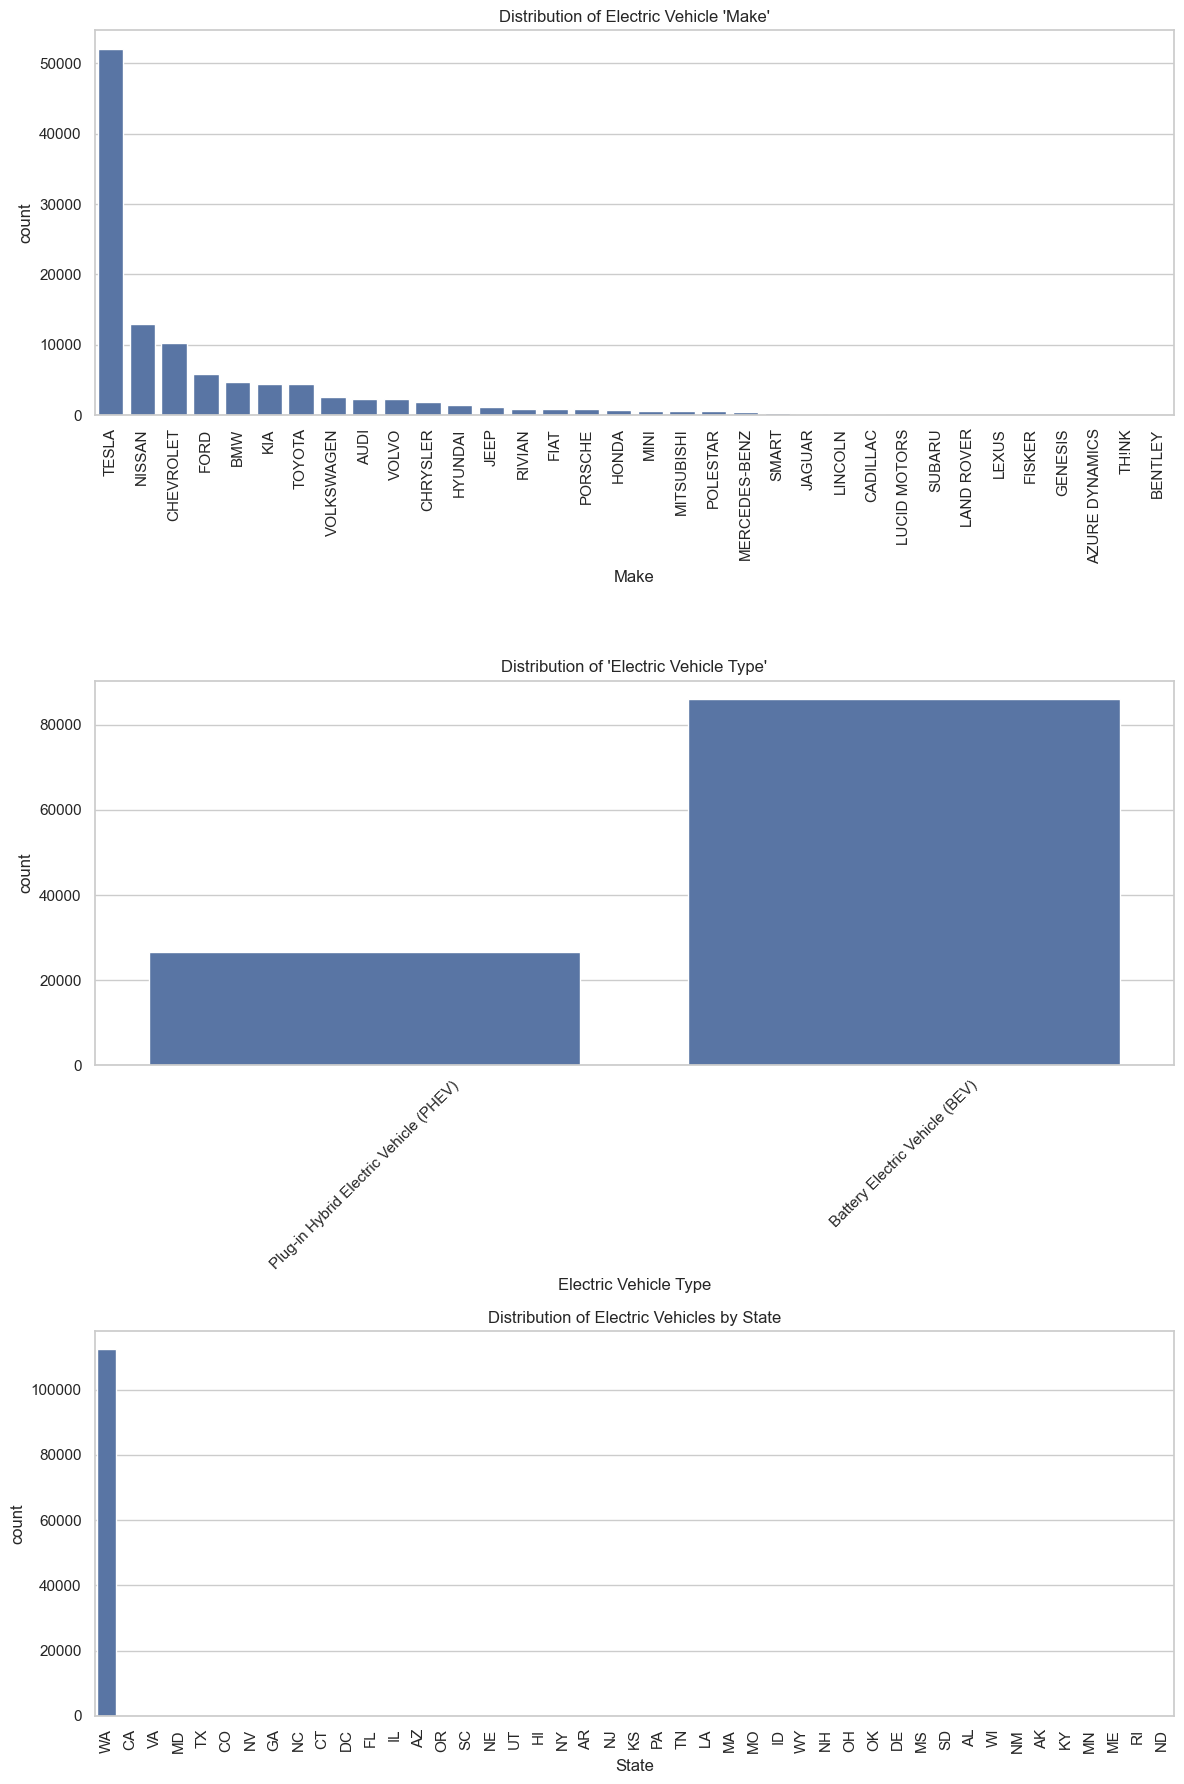

In [7]:
# theme for seaborn
sns.set_theme(style="whitegrid")

# Univariate Analysis
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot 1: Distribution of 'Make'
ax = sns.countplot(ax=axes[0], data=data, x='Make', order=data['Make'].value_counts().index)
axes[0].set_title("Distribution of Electric Vehicle 'Make'")
axes[0].tick_params(axis='x', labelrotation=90)

# Plot 2: Distribution of Electric Vehicle Type
ax = sns.countplot(ax=axes[1], data=data, x='Electric Vehicle Type')
axes[1].set_title("Distribution of 'Electric Vehicle Type'")
axes[1].tick_params(axis='x', labelrotation=45)

# Plot 3: Distribution of State
ax = sns.countplot(ax=axes[2], data=data, x='State', order=data['State'].value_counts().index)
axes[2].set_title("Distribution of Electric Vehicles by State")
axes[2].tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()

The Univariate Analysis results show:

*  Make Distribution: The dataset includes a variety of electric vehicle manufacturers, with certain brands like Chevrolet, Nissan, and Tesla being prominent.

* Electric Vehicle Type: The data contains two main types of electric vehicles: Battery Electric Vehicles (BEV) and Plug-in Hybrid Electric Vehicles (PHEV). BEVs dominate the dataset.

* State Distribution: Electric vehicles are distributed across several states, with some states having significantly more EVs than others.

Next, let's move on to Bivariate Analysis to explore relationships between variables. We'll focus on:

* Model Year vs Electric Range
* Make vs Electric Range
* State vs Electric Vehicle Type


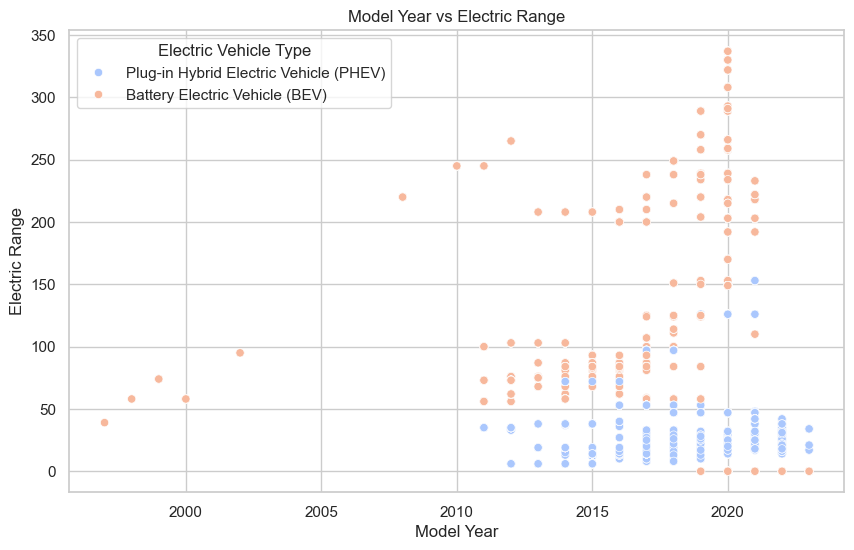

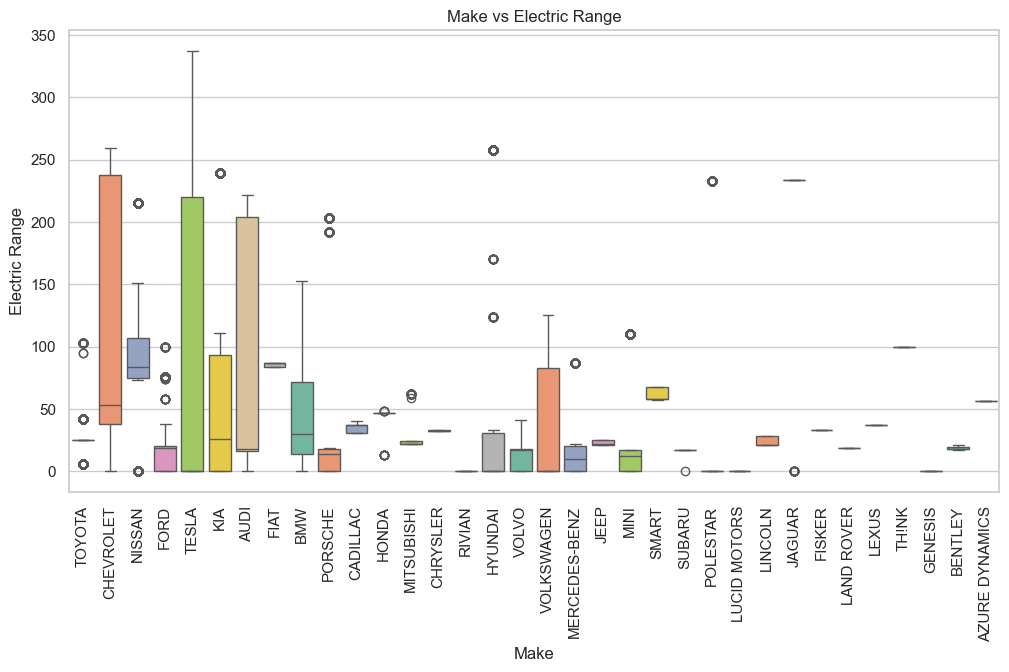

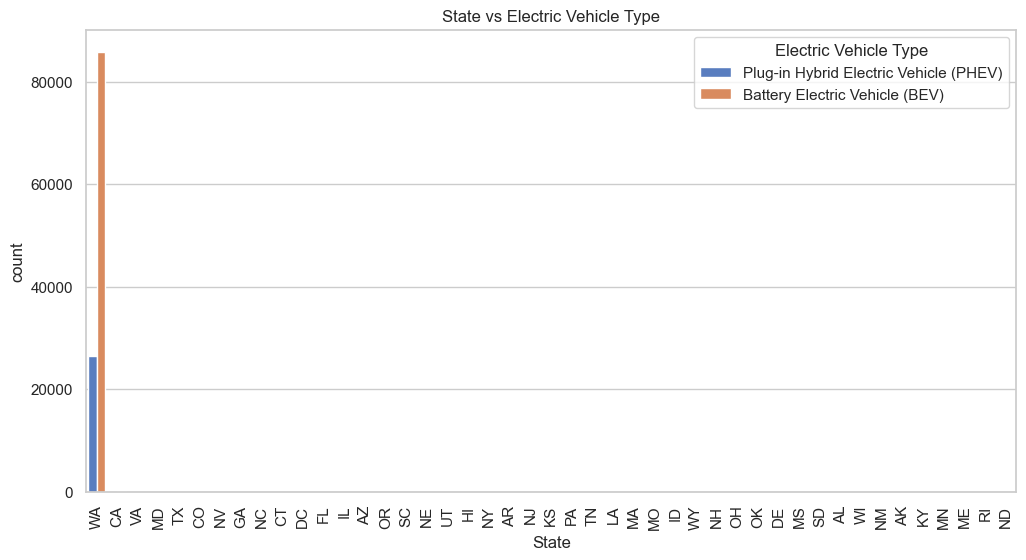

In [8]:
# Bivariate Analysis

# Plot 1: Model Year vs Electric Range
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Model Year', y='Electric Range', hue='Electric Vehicle Type', palette='coolwarm')
plt.title("Model Year vs Electric Range")
plt.show()

# Plot 2: Make vs Electric Range
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Make', y='Electric Range', hue='Make', palette='Set2')
plt.title("Make vs Electric Range")
plt.xticks(rotation=90)
plt.show()

# Plot 3: State vs Electric Vehicle Type
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='State', hue='Electric Vehicle Type', palette='muted', order=data['State'].value_counts().index)
plt.title("State vs Electric Vehicle Type")
plt.xticks(rotation=90)
plt.show()


The Bivariate Analysis results provide the following insights:

* Model Year vs Electric Range:

    There is a clear trend of increasing electric range in more recent model years. Battery Electric Vehicles (BEVs) tend to have higher electric ranges compared to Plug-in Hybrid Electric Vehicles (PHEVs).
* Make vs Electric Range:

    Different manufacturers exhibit varying electric ranges. For instance, Tesla has a consistently higher range across its models, while other brands like Chevrolet and Nissan have a broader spread.
* State vs Electric Vehicle Type:

    The distribution of electric vehicle types varies across states. BEVs are more prevalent in some states, while PHEVs are more common in others, indicating state-level preferences or regulations.

**Choropleth Map of EV Count by Location**

For this, we will create a choropleth using Plotly Express to visualize the number of electric vehicles based on their location (by state).

In [9]:
# Grouping data by state to count the number of EVs per state
state_ev_counts = data['State'].value_counts().reset_index()
state_ev_counts.columns = ['State', 'EV Count']

# choropleth map
fig = px.choropleth(
    state_ev_counts,
    locations='State',
    locationmode="USA-states",
    color='EV Count',
    scope="usa",
    title="Number of Electric Vehicles by State",
    color_continuous_scale="Blues")

fig.show()


In [10]:
# Grouping data by state to count the number of EVs per state
state_ev_counts = data['State'].value_counts().reset_index()
state_ev_counts.columns = ['State', 'EV Count']

# choropleth map
fig = px.choropleth(
    state_ev_counts,
    locations='State',
    locationmode="USA-states",
    color='EV Count',
    scope="usa",
    title="Number of Electric Vehicles by State",
    color_continuous_scale="Blues")

fig.show()


**Racing Bar Plot**

Creating a Racing Bar Plot, you can use the plotly.express library in Python to visualize the number of electric vehicles (EVs) by make for each year, creating an animation to show how the distribution evolves over time.



In [22]:
# Grouping by Model Year and Make to get the count of vehicles
make_year_counts = data.groupby(['Model Year', 'Make']).size().unstack(fill_value=0)

# Sorting index so that the years are in chronological order
make_year_counts = make_year_counts.sort_index()

# racing bar plot 
bcr.bar_chart_race(
    df=make_year_counts, 
    filename=None,  
    orientation='h', 
    sort='desc', 
    n_bars=10,  # top 10 car makes
    fixed_order=False, 
    fixed_max=True, 
    steps_per_period=30,
    interpolate_period=True,
    period_length=2000,  # speed of animation
    title='Racing Bar Chart of EV Make Counts Over Years',
    cmap='dark12',  # Color map for the bars
    period_fmt='%d',
    figsize=(10, 6),
    filter_column_colors=True)


/home/kokane-vishal/Documents/Innomatics Labs/.venv/lib/python3.12/site-packages/bar_chart_race/_make_chart.py:286: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/home/kokane-vishal/Documents/Innomatics Labs/.venv/lib/python3.12/site-packages/bar_chart_race/_make_chart.py:287: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

